# 1. Loading Required Libraries

**Libraries needed for data processing, visualization, and modeling are imported.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/kaggle/input/medical-insurance-premium-prediction/Medicalpremium.csv")
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [2]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# 2. Loading and Initial Exploration of the Dataset

**The Medicalpremium.csv file is loaded, and basic information is obtained by displaying the features of knowladge summary statistics.**

In [3]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


# 3. Missing Data Analysis

**The dataset is checked for missing values to determine if data cleaning is needed.**

In [4]:
#Checked Nan Values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df["PremiumPrice"].value_counts()

PremiumPrice
23000    249
15000    202
28000    132
25000    103
29000     72
30000     47
35000     41
38000     34
31000     31
21000     26
19000     15
26000      7
39000      5
24000      4
32000      4
16000      3
18000      2
34000      2
36000      2
22000      1
40000      1
20000      1
27000      1
17000      1
Name: count, dtype: int64

# 4. Data Visualization and Exploratory Data Analysis (EDA)

**A correlation matrix is visualized to understand the relationships between features.**

<Axes: >

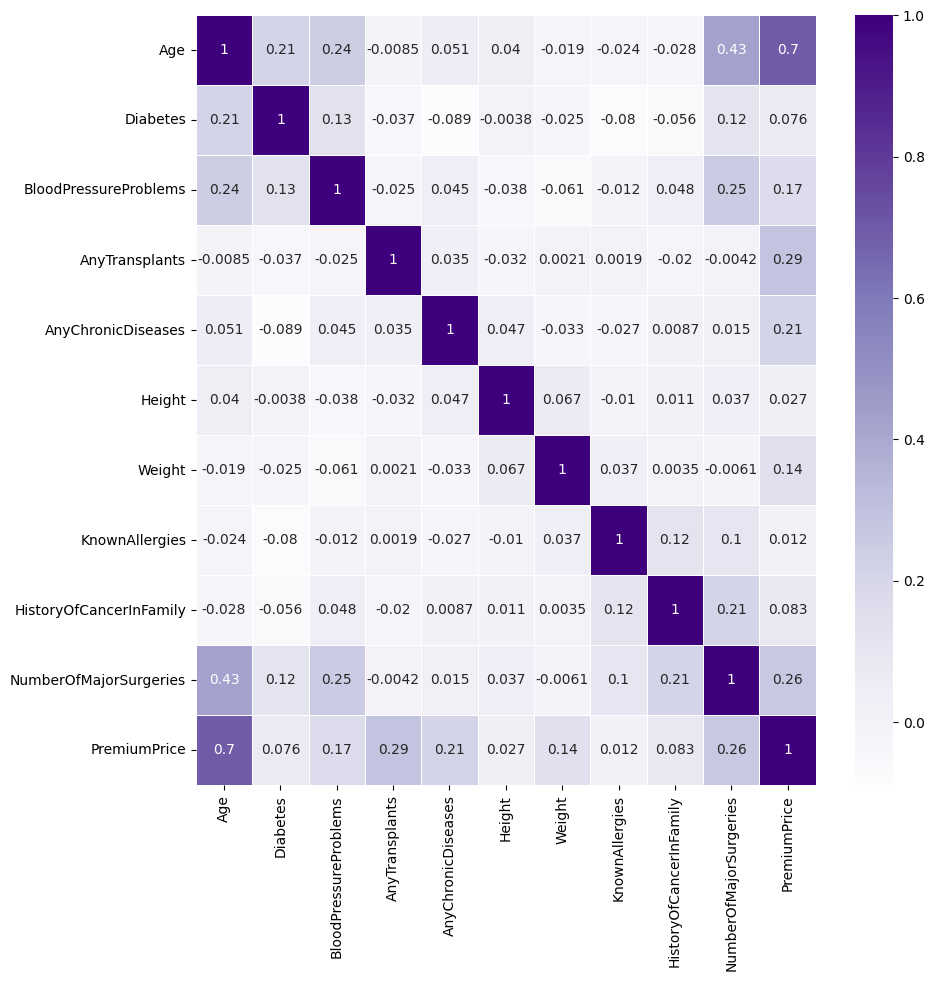

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [7]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


**A scatter plot is used to show the relationship between height and weight.**

/tmp/ipykernel_17/2890303201.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df, x="Height", y="Weight", s=100, palette="deep")


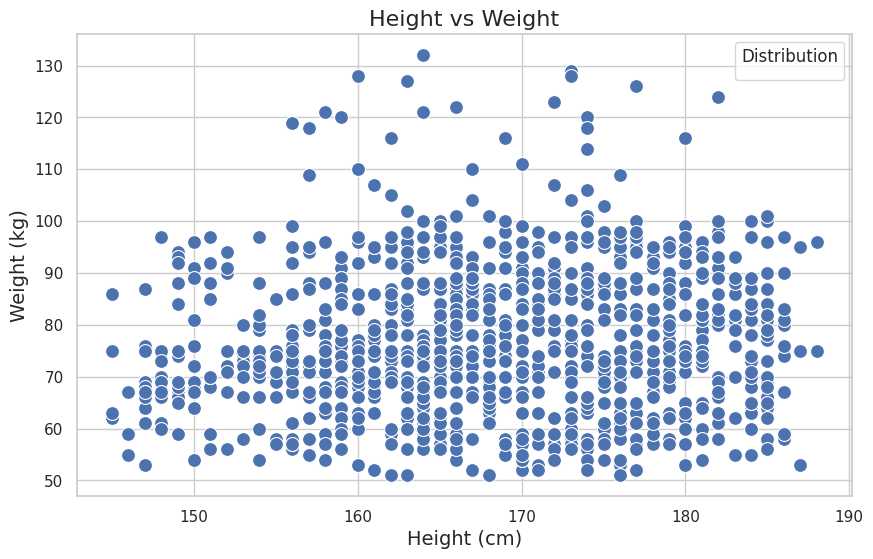

In [8]:
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="Height", y="Weight", s=100, palette="deep")

# Başlık ve etiketler
plt.title("Height vs Weight", fontsize=16)
plt.xlabel("Height (cm)", fontsize=14)
plt.ylabel("Weight (kg)", fontsize=14)

# Efsane
plt.legend(title='Distribution')

# Grid
plt.grid(True)

# Göster
plt.show()

# 5. Preparing the Dataset for Modeling

**The PremiumPrice column is selected as the target variable, and the dataset is split into features (X) and target (Y) for modeling.**

In [9]:
X = df.drop(columns=["PremiumPrice"]).values
Y=df["PremiumPrice"].values

In [10]:
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
print(Y_train.shape)

(788, 10)
(198, 10)


# 6. Splitting the Dataset into Training and Testing Sets

**The dataset is divided into training and test sets to evaluate the model's performance on unseen data.**

In [11]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

(788, 10)
(788,)


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
predictions1 = logreg.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions1))
print('\n')
print(classification_report(Y_test, predictions1))

Confusion Matrix: 
 [[39  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  0 42  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1 15  0  0  0  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  1  5  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  1  0  0  0  2  0  2  0  3  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [14]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(Y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.8080808080808081


In [15]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))


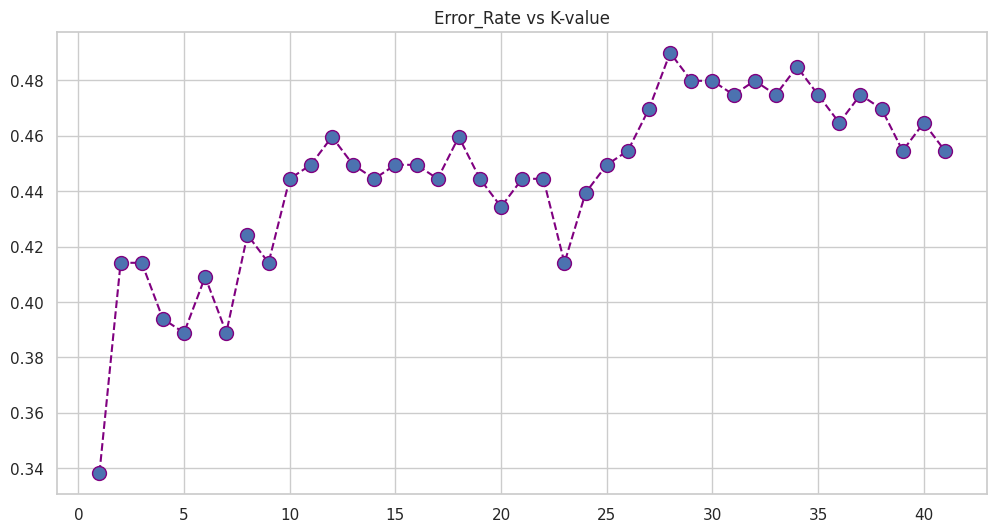

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
predictions2 = knn.predict(X_test)

In [18]:
print(confusion_matrix(Y_test, predictions2))
print("\n")
print(classification_report(Y_test, predictions2))

[[35  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0 38  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  7  6  0  0  4  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5  0 16  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  9  3  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  2  0  0  0  5  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  3  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  1  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7]]


              precision    recall  f1-score   support

       15000       0.69 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
knn_model_acc = accuracy_score(Y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.5858585858585859


In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, Y_train)
predictions4 = rfc.predict(X_test)

In [21]:
print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions4))
print("\n")
print(classification_report(Y_test, predictions4))

Confusion Matrix: 
 [[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  7  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  1  0  2  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]


              precision    recall  f1-score   support

    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
rfc_acc = accuracy_score(Y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9292929292929293


In [23]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, Y_train)
predictions5 = svc_model.predict(X_test)

In [24]:
print("Confusion Matrix: \n", confusion_matrix(Y_test, predictions5))
print("\n")
print(classification_report(Y_test, predictions5))

Confusion Matrix: 
 [[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0 42  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  3 14  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 22  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  2  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  1  0  0  2  1  2  0  2  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8]]


              precision    recall  f1-score   support

    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
svm_acc = accuracy_score(Y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.7828282828282829


In [26]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 10
[LightGBM] [Info] Start training from score -1.594324
[LightGBM] [Info] Start training from score -5.976351
[LightGBM] [Info] Start training from score -6.669498
[LightGBM] [Info] Start training from score -6.669498
[LightGBM] [Info] Start training from score -4.104549
[LightGBM] [Info] Start training from score -6.669498
[LightGBM] [Info] Start training from score -3.673766
[LightGBM] [Info] Start training from score -1.346488
[LightGBM] [Info] Start training from score -5.283204
[LightGBM] [Info] Start training from score -2.226847
[LightGBM] [Info] Start training from score -4.877739
[LightGBM] [Info] Start training from score -6.669498
[L

LGBMClassifier()

In [27]:
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred)))

LightGBM Model accuracy score: 0.9394


In [28]:
print("Logistic Regression Score: ",logreg_acc)
print("KNN Score: ",knn_model_acc)
print("RandomForest Score: ",rfc_acc)
print("SVM Score: ",svm_acc)
print("LightGBM Score: ", accuracy)

Logistic Regression Score:  0.8080808080808081
KNN Score:  0.5858585858585859
RandomForest Score:  0.9292929292929293
SVM Score:  0.7828282828282829
LightGBM Score:  0.9393939393939394


In [29]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None,predictions=True)
models, predictions1 = reg.fit(X_train, X_test, Y_train, Y_test)

models

 79%|███████▊  | 33/42 [00:09<00:01,  4.91it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:10<00:00,  4.18it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 10
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.88,0.88,2227.06,0.40
LGBMRegressor,0.87,0.88,2255.57,0.06
RandomForestRegressor,0.87,0.88,2304.50,0.32
BaggingRegressor,0.86,0.87,2373.52,0.05
GradientBoostingRegressor,0.85,0.86,2483.33,0.22
ExtraTreesRegressor,0.83,0.84,2605.64,0.24
XGBRegressor,0.79,0.80,2929.51,0.14
TransformedTargetRegressor,0.70,0.71,3495.95,0.01
LinearRegression,0.70,0.71,3495.95,0.01


In [30]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,predictions=True)
models,predictions1 = clf.fit(X_train, X_test, Y_train, Y_test)
models

 90%|████████▉ | 26/29 [00:02<00:00, 13.05it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 10
[LightGBM] [Info] Start training from score -1.594324
[LightGBM] [Info] Start training from score -5.976351
[LightGBM] [Info] Start training from score -6.669498
[LightGBM] [Info] Start training from score -6.669498
[LightGBM] [Info] Start training from score -4.104549
[LightGBM] [Info] Start training from score -6.669498
[LightGBM] [Info] Start training from score -3.673766
[LightGBM] [Info] Start training from score -1.346488
[LightGBM] [Info] Start training from score -5.283204
[LightGBM] [Info] Start training from score -2.226847
[LightGBM] [Info] Start training from score -4.877739
[LightGBM] [Info] Start training from score -6.669498
[L

100%|██████████| 29/29 [00:03<00:00,  7.88it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.62,None,0.93,0.84
RandomForestClassifier,0.92,0.60,None,0.91,0.34
BaggingClassifier,0.92,0.59,None,0.91,0.06
DecisionTreeClassifier,0.88,0.57,None,0.89,0.02
ExtraTreesClassifier,0.85,0.51,None,0.83,0.29
LinearDiscriminantAnalysis,0.76,0.46,None,0.75,0.08
LogisticRegression,0.81,0.46,None,0.79,0.09
LinearSVC,0.79,0.46,None,0.76,0.18
SGDClassifier,0.69,0.44,None,0.69,0.06


In [31]:
!pip install skimpy
from skimpy import generate_test_data, skim

df = generate_test_data()
skim(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompa

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 1000   │ │ float64     │ 3     │ │ class                 │                                │
│ │ Number of columns │ 13     │ │ category    │ 2     │ │ location              │                                │
│ └───────────────────┴────────┘ │ datetime64  │ 2     │ └───────────────────────┘                                │
│                                │ object      │ 2     │                                                          │
│                                │ int64       │ 1     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                │ string      │ 1     │                                                          │
│                                │ timedelta64 │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA % ┃ mean     ┃ sd     ┃ p0        ┃ p25     ┃ p50        ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ length       │   0 │    0 │   0.5016 │ 0.3597 │ 1.573e-06 │   0.134 │     0.4976 │ 0.8602 │     1 │ ▇▃▃▃▅▇ │  │
│ │ width        │   0 │    0 │    2.037 │  1.929 │  0.002057 │   0.603 │      1.468 │  2.953 │ 13.91 │  ▇▃▁   │  │
│ │ depth        │   0 │    0 │    10.02 │  3.208 │         2 │       8 │         10 │     12 │    20 │ ▁▃▇▆▃▁ │  │
│ │ rnd          │ 118 │ 11.8 │ -0.01977 │  1.002 │    -2.809 │ -0.7355 │ -0.0007736 │ 0.6639 │ 3.717 │ ▁▅▇▅▁  │  │
│ └──────────────┴─────┴──────┴──────────┴────────┴───────────┴─────────┴────────────┴────────┴───────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                            │         0 │              0 │ False                 │                  2 │  │
│ │ location                         │         1 │            0.1 │ False                 │                  5 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ booly_col                          │             516

<Axes: >

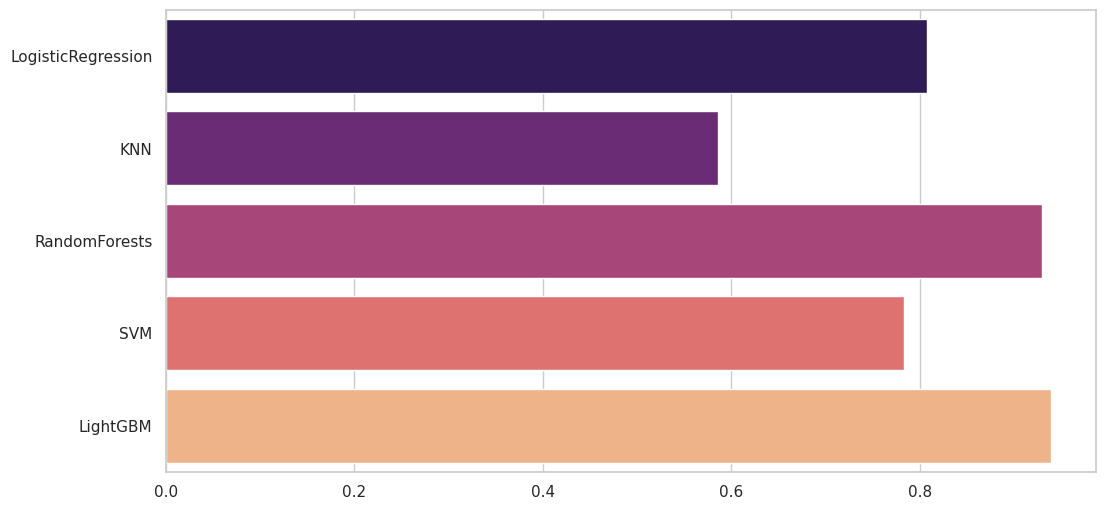

In [32]:
plt.figure(figsize=(12,6))
model_acc = [logreg_acc, knn_model_acc, rfc_acc, svm_acc,accuracy]
model_name = ['LogisticRegression', 'KNN', 'RandomForests', 'SVM',"LightGBM"]
sns.barplot(x= model_acc, y=model_name, palette='magma')

# Project Summary
**This project aims to predict medical insurance premiums based on various factors, such as age, BMI, gender, and lifestyle indicators. Through Exploratory Data Analysis (EDA), we visualized relationships between features to identify influential factors. After pre-processing the data and splitting it into training and test sets, we tested several machine learning models, including Decision Trees, Random Forest, and Logistic Regression, to find the best predictive model.**

**Results:
The Random Forest yielded an accuracy score of 92% on the test set, demonstrating its effectiveness in predicting insurance premiums. This model could be further improved by adding more feature engineering or using advanced algorithms for enhanced precision.**